In [31]:
from sklearn import model_selection, metrics, ensemble     #, grid_search
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing

In [2]:
#read training data
df = pd.read_csv('train.csv')
df = df.sample(frac=0.6)           #random select 60% of rows
print(df)

                                                 msno  \
3014303  Twph2nyPV2W1Ae92+27FpJIOJQiTWnf19eG+HHqW6ks=   
4023331  G5bN8m9bSlhREpEQpyMK/ENgX+ZCBR+RhZOaWRdQOy0=   
1554367  z9S4nHfx7X3fET/Sg5xTxyBh5SuqM9T+BhBVZlXvs2E=   
3153002  APQ8HjfQWoPXHuzPWpIJtkVg7qLvsZGfQIK1HHxbNV0=   
73873    RwhUFRSlCnsqR++Bri5eq4A9cJxQ8weKwi/IY1ERf9g=   
...                                               ...   
3786990  V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=   
4584984  OCH8rv8ZPcAK5olazWdIEAAeoCdVl9FOugQmfvF+3Dc=   
4536613  lUCqJVrPbD0p+qRquqVLG1sUEYq8BbBS0qfAGaY8LoQ=   
3756758  B7h2cLrN4mDgYLEVoLG4iyvPekN6bme2B+1eGXOqHzY=   
5378307  yx05Q8J73CUIX8zrH54EedujaErTh1CzjScc/faTuSw=   

                                              song_id source_system_tab  \
3014303  gu/lHDjq6qqpU7r3CQkvRpGF9kqc2Mrn9CZhb7jrFvY=          discover   
4023331  0K/6UP5WwekreiQMdL4P+7SMqVAZk6XzltjGJfTU/0E=        my library   
1554367  Kmr4FArupcXt834/QVwAeGbolEi0sbTka/r+976fAxw=        my library   
3153002  2Mtfm7

In [3]:
#using songs and members dataset
songs = pd.read_csv('songs.csv')
print(songs)
df = pd.merge(df, songs, on='song_id', how='left') #merge the dataframe by songs_id
del songs                    #delete the variables song

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

In [4]:
# Load and join songs data
members = pd.read_csv('members.csv')
print(members)
df = pd.merge(df, members, on='msno', how='left')   #merge the dataframe by msno
del members

                                               msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                20110820         20170920  
1    

In [5]:
#the percentage of null values
df.isnull().sum()/df.isnull().count()

msno                      0.000000
song_id                   0.000000
source_system_tab         0.003368
source_screen_name        0.056139
source_type               0.002903
target                    0.000000
song_length               0.000014
genre_ids                 0.016086
artist_name               0.000014
composer                  0.227164
lyricist                  0.430934
language                  0.000019
city                      0.000000
bd                        0.000000
gender                    0.401442
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
dtype: float64

In [6]:
#removing NA values from df

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [7]:
# seperate the column of registration_init_date with month, year and day

df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


# seperate the column of expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day



In [10]:
# convert into categorical values

df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [11]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    #df[col] = df[col].astype('category')

msno
song_id
source_system_tab
source_screen_name
source_type
genre_ids
artist_name
composer
lyricist
gender


In [12]:
df.select_dtypes(include=['object'])

,msno,song_id,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,gender
0,Twph2nyPV2W1Ae92+27FpJIOJQiTWnf19eG+HHqW6ks=,gu/lHDjq6qqpU7r3CQkvRpGF9kqc2Mrn9CZhb7jrFvY=,discover,Online playlist more,online-playlist,465,Redfoo,unknown,unknown,unknown
1,G5bN8m9bSlhREpEQpyMK/ENgX+ZCBR+RhZOaWRdQOy0=,0K/6UP5WwekreiQMdL4P+7SMqVAZk6XzltjGJfTU/0E=,my library,Local playlist more,local-library,465,閃靈樂團 (Chthonic),林昶佐 FREDDY LIM,林昶佐 FREDDY LIM,male
2,z9S4nHfx7X3fET/Sg5xTxyBh5SuqM9T+BhBVZlXvs2E=,Kmr4FArupcXt834/QVwAeGbolEi0sbTka/r+976fAxw=,my library,Local playlist more,local-playlist,458,楊丞琳 (Rainie Yang),Xiao-Leng,Yi-Xuan Jian| Xi-Xuan Yan,male
3,APQ8HjfQWoPXHuzPWpIJtkVg7qLvsZGfQIK1HHxbNV0=,2Mtfm7W61oEjymMCTA8Dz1NY86hPCvEzTc82W9BnnYY=,radio,Radio,radio,465|921,牽牛花開的日子電視原聲帶,方炯鑌,馬嵩惟,unknown
4,RwhUFRSlCnsqR++Bri5eq4A9cJxQ8weKwi/IY1ERf9g=,TqascA3xFEFnVM1aQ4Ok2YLsnRzOWBGrmgH+1LtkU6s=,my library,Local playlist more,local-playlist,465,S.H.E,Roberto Rosan + Heiko Schmidt,施人誠,female
...,...,...,...,...,...,...,...,...,...,...
4426446,V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=,OiD1VHBxqXrBqGbq8sU60gOq2c2wB14KgbyZU+o23mQ=,discover,Online playlist more,online-playlist,359,Coldplay,unknown,unknown,unknown
4426447,OCH8rv8ZPcAK5olazWdIEAAeoCdVl9FOugQmfvF+3Dc=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,discover,Online playlist more,online-playlist,465,Justin Bieber,Justin Bieber| Julia Michaels| Michael Tucker|...,unknown,female
4426448,lUCqJVrPbD0p+qRquqVLG1sUEYq8BbBS0qfAGaY8LoQ=,VEHQ9uyNfwMBFPtkLOFGSOnovTSfj6RlQbgYZYp1xZQ=,my library,Local playlist more,local-library,465,陳零九 (Nine Chen),陳零九,陳零九,unknown
4426449,B7h2cLrN4mDgYLEVoLG4iyvPekN6bme2B+1eGXOqHzY=,yu1A1+49QYe9AXlOvdcoUHS3/hrFU6K2+oFARMn+rIo=,my library,Album more,album,947,α波童話音樂盒系列,unknown,unknown,male


In [13]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [14]:
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df = df.drop(['expiration_date', 'lyricist'], 1)

# Data dimension reduction

In [15]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Training via Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
model.fit(df[df.columns[df.columns != 'target']], df.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
y = df['target'].values
model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])

In [20]:
model.score(df[df.columns[df.columns != 'target']], df.target)

0.5952260625950677

# Data preprocessing for Testing set

In [21]:
df_test=pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes
    

In [22]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [23]:
predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [24]:
predictions = predictions/3

submission = pd.read_csv('sample_submission.csv')
#submission = submission.sample(frac=0.6)
submission.target=predictions
submission.to_csv('LR.csv',index=False)

In [25]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

# Results

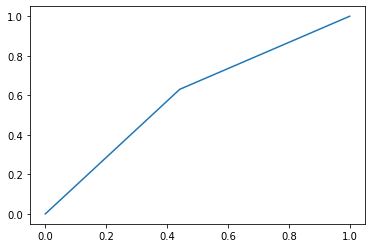

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

In [27]:
plt.show()

In [28]:
roc_auc

0.5943045063096976

In [29]:
X_array=test['target'].values

In [30]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(X_array,predictions_roc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.60      0.56      0.58    879182
     class 1       0.59      0.63      0.61    891399

    accuracy                           0.59   1770581
   macro avg       0.59      0.59      0.59   1770581
weighted avg       0.59      0.59      0.59   1770581

